In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import os
import json
import numpy as np
from collections import defaultdict
from IPython.display import display, HTML

from matplotlib import colors as mcolors
from matplotlib import cm
from mycolorpy import colorlist as mcp
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

In [2]:
dirs = [
        "/home/noah/ESSL/experiments/ssl_testing3/BYOL",
        "/home/noah/ESSL/experiments/ssl_testing3/NNCLR",
       # "/home/noah/ESSL/experiments/ssl_testing3/SimCLR",
        "/home/noah/ESSL/experiments/ssl_testing3/SwaV"
]


# vals = pd.read_csv(os.path.join(dirs[0], "outcomes.csv"))
vals = pd.DataFrame(columns=pd.read_csv(os.path.join(dirs[0], "outcomes.csv")).columns)
for d in dirs:
    f = os.path.join(d, "outcomes.csv")
    f = pd.read_csv(f)
    f["method"] = [os.path.basename(d) for _ in range(len(f))]
    vals = pd.concat([vals, f])


with open(os.path.join(dirs[0], "chromosomes.json"), "r") as f:
    chromos = json.load(f)
c_strings = []
ops = []
for i in range(len(chromos)):
    c = chromos[str(i)]
    c = [c_i[0] for c_i in c]
    c_strings.append(" ".join(c))
    ops.append(c)
chromo_df = pd.DataFrame(ops, columns=["op1", "op2", "op3"])
colors=mcp.gen_color(cmap='Paired',n=len(c_strings))
chromo_colors = {chromo:color for chromo, color in zip(c_strings, colors)}
chromo_df["chromosome"] = c_strings
chromos = {}
for method in vals["method"].unique():
    vals_i = vals[vals["method"] == method]
    chromo_df_i = pd.concat([chromo_df, vals_i], axis=1)
    chromo_df_i = chromo_df_i.drop(columns=["Unnamed: 0", "chromosome"])
    chromos[method] = chromo_df_i



{'BYOL':             op1         op2         op3 final ssl loss final train loss  \
0    Brightness      ShearX    Solarize      -0.987169          0.51714   
1      Contrast      Rotate  TranslateX      -0.988681         0.522079   
2        ShearY  TranslateY       Color      -0.993385         0.529644   
3         Color    Solarize   Sharpness      -0.988941         0.533313   
4        Rotate       Color  TranslateX      -0.989029          0.51801   
..          ...         ...         ...            ...              ...   
240  TranslateY      ShearX   Sharpness      -0.992851         0.523069   
241      Rotate    Contrast       Color      -0.991757         0.528115   
242   Sharpness  TranslateX       Color       -0.98963         0.520191   
243    Solarize  Brightness    Contrast      -0.985784         0.515166   
244   Sharpness  TranslateX  Brightness      -0.984669         0.523568   

    final val loss final test loss test acc  train acc val acc method  
0         0.561454

Exploring test acc top k operators

In [5]:
all_ops = set(list(chromos['BYOL']["op1"].unique())+ list(chromos['BYOL']["op2"].unique()) + list(chromos['BYOL']["op3"].unique()))
all_ops

{'Brightness',
 'Color',
 'Contrast',
 'Rotate',
 'Sharpness',
 'ShearX',
 'ShearY',
 'Solarize',
 'TranslateX',
 'TranslateY'}

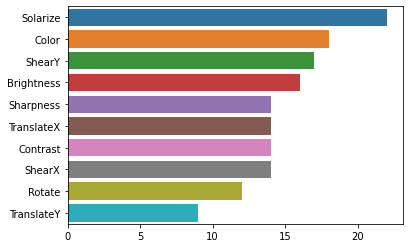

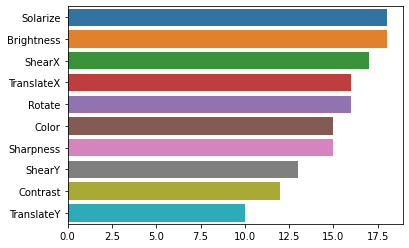

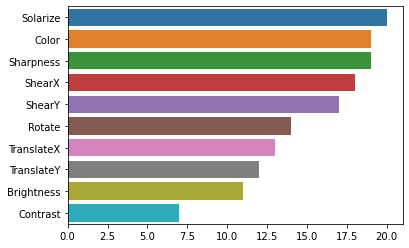

<Figure size 432x288 with 0 Axes>

In [19]:
N = 50
for method in chromos:
    chromos_i = chromos[method]
    chromos_i = chromos_i.sort_values(by="test acc")
    counts = []
    both = []
    for op in all_ops:
        c = (chromos_i["op1"] == op)[:N].sum() + (chromos_i["op2"] == op)[:N].sum() + (chromos_i["op3"] == op)[:N].sum()
        counts.append(c)
        both.append([op, c])
    both.sort(key=lambda x: x[1], reverse=True)
    
    sns.barplot(x=[i[1] for i in both], y=[i[0] for i in both])
    plt.show()
    plt.clf()
